In [1]:
# 포켓몬 데이터셋
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pokemon_df = pd.read_csv('Pokemon_Dataset.csv')
pokemon_df = pd.DataFrame(pokemon_df)
pokemon_df.head()

,Number,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80


In [5]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Number   200 non-null    int64 
 1   Name     200 non-null    object
 2   Type1    200 non-null    object
 3   Type2    90 non-null     object
 4   Total    200 non-null    int64 
 5   HP       200 non-null    int64 
 6   Attack   200 non-null    int64 
 7   Defense  200 non-null    int64 
 8   SpAtk    200 non-null    int64 
 9   SpDef    200 non-null    int64 
 10  Speed    200 non-null    int64 
dtypes: int64(8), object(3)
memory usage: 17.3+ KB


In [7]:
# type 2 삭제
pokemon_df.drop('Type2' ,axis = 1)

,Number,Name,Type1,Total,HP,Attack,Defense,SpAtk,SpDef,Speed
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45
1,2,Ivysaur,Grass,405,60,62,63,80,80,60
2,3,Venusaur,Grass,525,80,82,83,100,100,80
3,4,Charmander,Fire,309,39,52,43,60,50,65
4,5,Charmeleon,Fire,405,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...,...
195,196,Espeon,Psychic,525,65,65,60,130,95,110
196,197,Umbreon,Dark,525,95,65,110,60,130,65
197,198,Murkrow,Dark,405,60,85,42,85,42,91
198,199,Slowking,Water,490,95,75,80,100,110,30


In [15]:
pokemon_df.columns

Index(['Number', 'Name', 'Type1', 'Type2', 'Total', 'HP', 'Attack', 'Defense',
       'SpAtk', 'SpDef', 'Speed'],
      dtype='object')

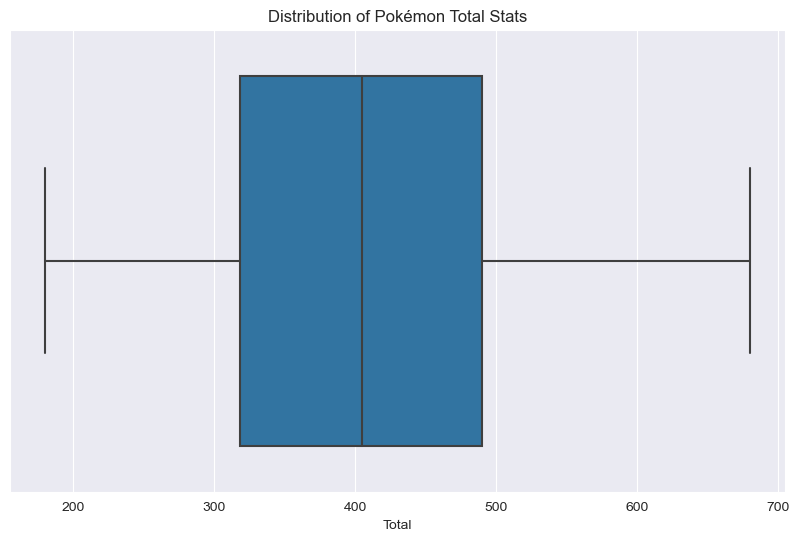

In [35]:
# 포켓몬의 전체 능력치 분포 시각화
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=pokemon_df, x='Total')
plt.xlabel('Total')
plt.title('Distribution of Pokémon Total Stats')
plt.show()


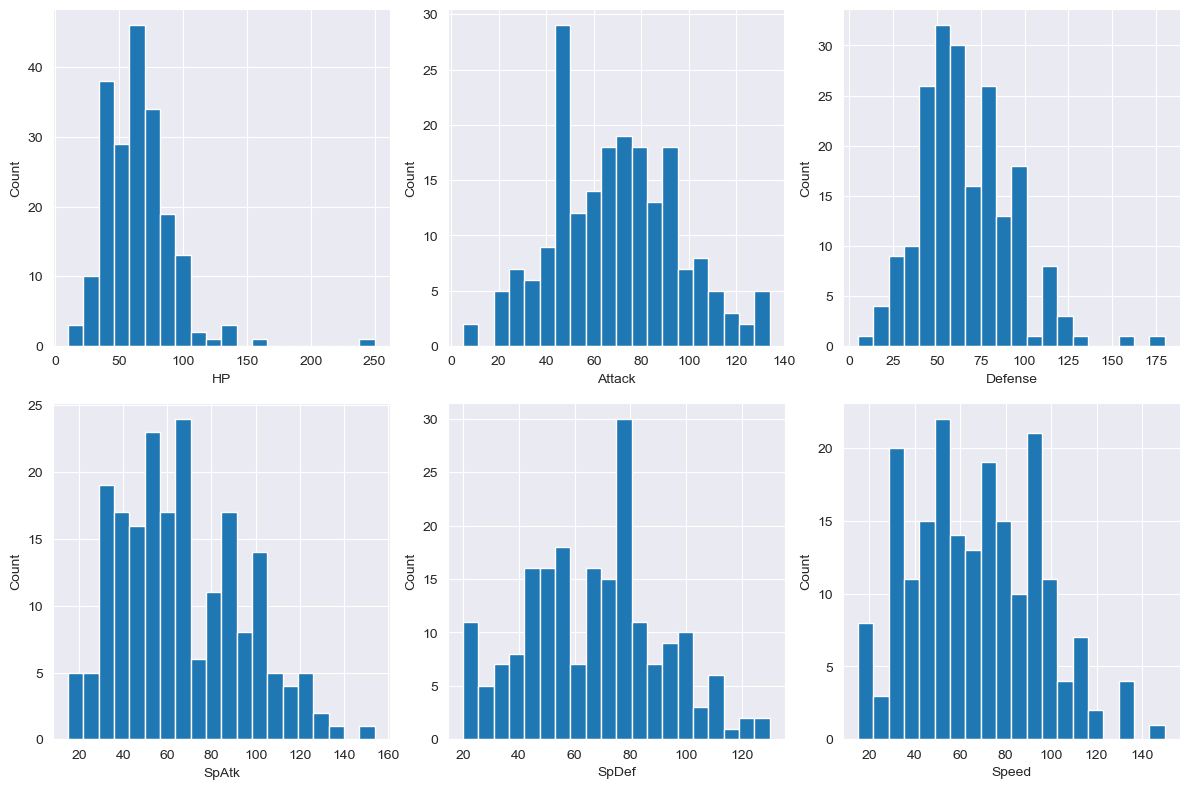

In [19]:
# 포켓몬 stats 분포 시각화
stats = ['HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed']
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize= (12,8))

for i, stat  in enumerate(stats):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.hist(pokemon_df[stat], bins = 20)
    ax.set_xlabel(stat)
    ax.set_ylabel('Count')

plt. tight_layout()
plt.show()

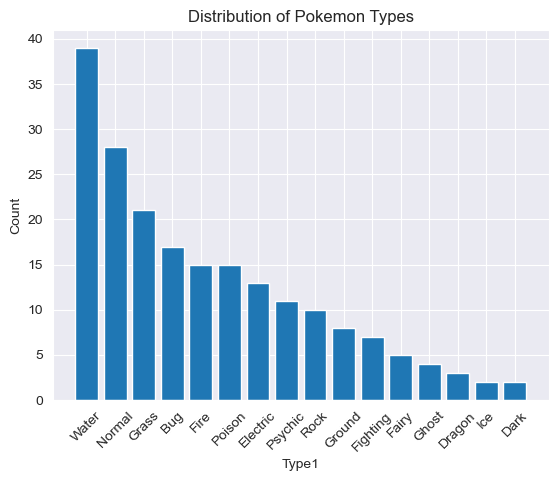

In [37]:
# 포켓몬 타입에 따른 수 시각화
type_df= pokemon_df['Type1'].value_counts()
plt.bar(type_df.index, type_df.values)
plt.xlabel('Type1')
plt.ylabel('Count')
plt.title('Distribution of Pokemon Types')
plt.xticks(rotation = 45)
plt.show()

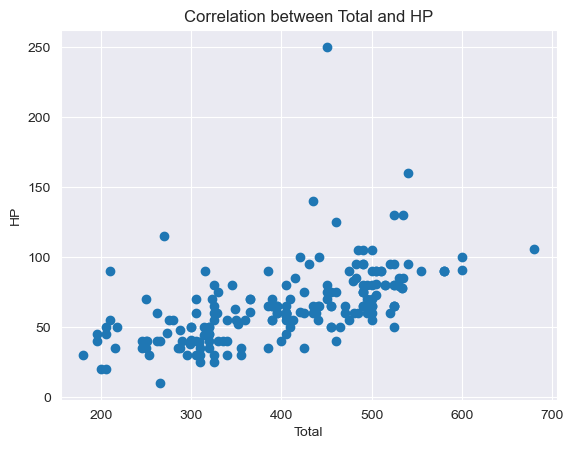

In [25]:
# 포켓몬의 전체 스탯과 HP의 상관관계 시각화
plt.scatter(pokemon_df['Total'], pokemon_df['HP'])
plt.xlabel('Total')
plt.ylabel('HP')
plt.title('Correlation between Total and HP')
plt.show()

Text(0.5, 1.0, 'Correlation between Total and HP')

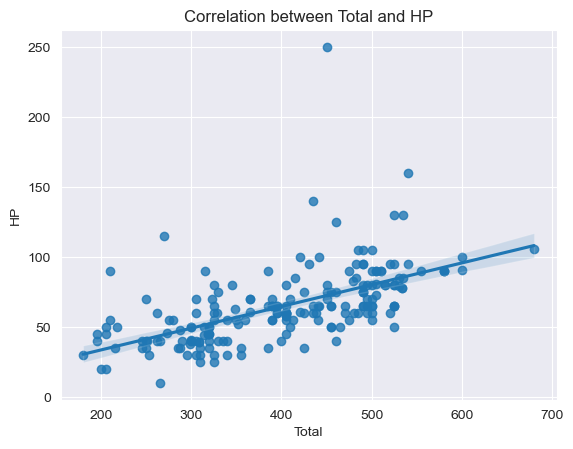

In [34]:
sns.regplot(data = pokemon_df, x = 'Total', y = 'HP')
plt.xlabel('Total')
plt.ylabel('HP')
plt.title('Correlation between Total and HP')

<Axes: xlabel='Attack', ylabel='Defense'>

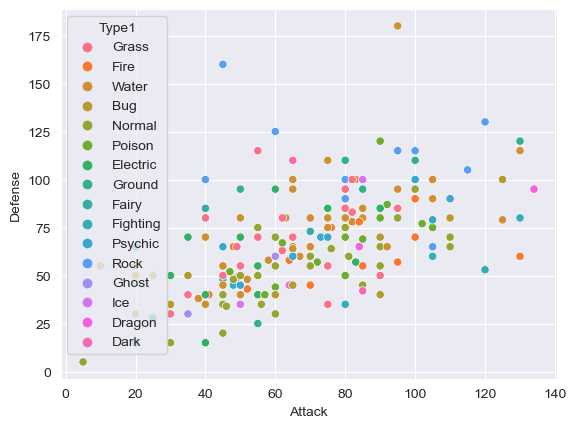

In [33]:
# 포켓몬의 공격력에 따른 방어력 분포 type1구분하여 시각화
sns.scatterplot(data = pokemon_df, x = 'Attack', y = 'Defense', hue = 'Type1')

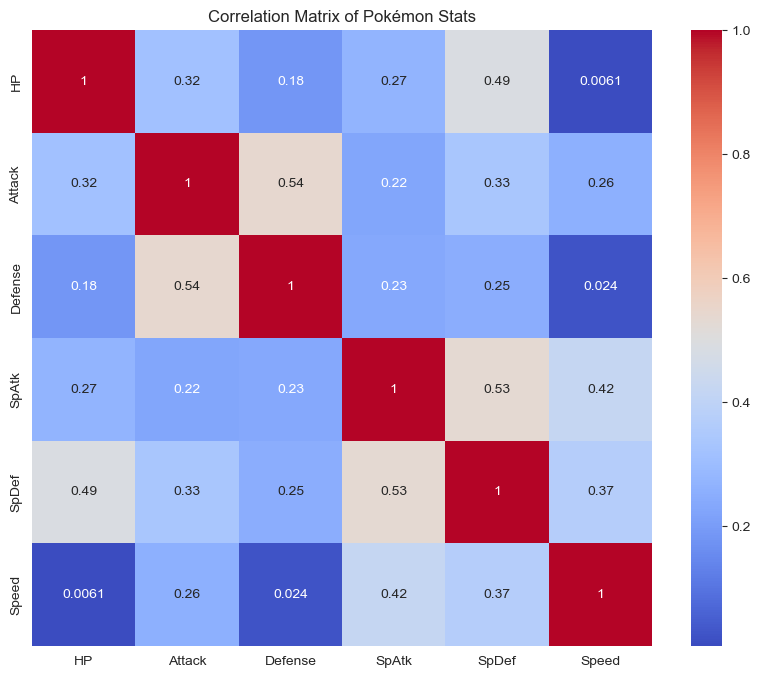

In [28]:
# 포켓몬의 능력치 사이의 상관관계 시각화
corr_matrix = pokemon_df[['HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Pokémon Stats')
plt.show()

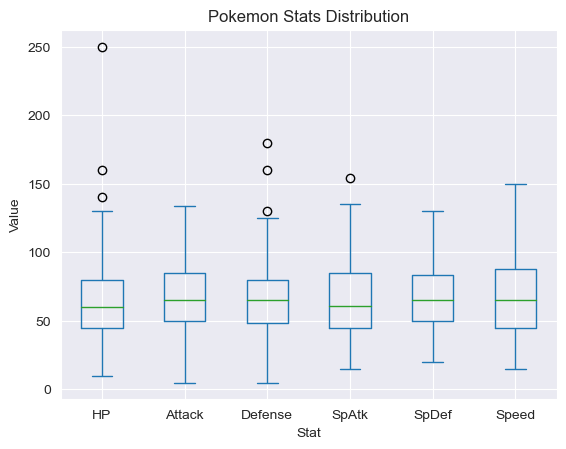

In [31]:
# 포켓몬의 스탯 정보 시각화하여 분포와 이상치 확인
stats_columns = ['HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed']
pokemon_stats = pokemon_df[stats_columns]
pokemon_stats.plot(kind='box')
plt.xlabel('Stat')
plt.ylabel('Value')
plt.title('Pokemon Stats Distribution')
plt.show()


In [38]:
# 선형 회귀 모델을 사용하여 포켓몬의 공격력, 방어력, 특수 공격력, 특수 방어력, 스피드를 기반으로 HP 예측
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 전처리
features = ['Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed']
target = ['HP']
X = pokemon_df[features]
y = pokemon_df[target]

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('R^2 Score:', r2)


Mean Squared Error (MSE): 356.579693604497
R^2 Score: 0.22176456578166914


In [39]:
# 포켓몬 대결 함수
def pokemon_battle(pokemon1, pokemon2):
    # 포켓몬 능력치 가져오기
    stats1 = pokemon_df.loc[pokemon_df['Name'] == pokemon1, ['HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed']]
    stats2 = pokemon_df.loc[pokemon_df['Name'] == pokemon2, ['HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed']]

    if stats1.empty or stats2.empty:
        print('포켓몬 이름을 정확히 입력해주세요.')
    else:
        # 포켓몬 대결 시뮬레이션
        power1 = stats1.sum(axis=1).values[0]
        power2 = stats2.sum(axis=1).values[0]

        # 이긴 포켓몬 출력
        if power1 > power2:
            print(pokemon1, '이(가)', pokemon2, '를 이겼습니다!')
        elif power1 < power2:
            print(pokemon2, '이(가)', pokemon1, '를 이겼습니다!')
        else:
            print(pokemon1, '과(와)', pokemon2, '는 무승부입니다!')

# 사용자 입력 받기
pokemon_name1 = input('첫 번째 포켓몬 이름을 입력하세요: ')
pokemon_name2 = input('두 번째 포켓몬 이름을 입력하세요: ')

# 포켓몬 대결 시뮬레이션 실행
pokemon_battle(pokemon_name1, pokemon_name2)

Pikachu 이(가) Squirtle 를 이겼습니다!
